
### Aim:CNN for object recognition


---

## Algorithm 
1] Import dataset and libraries   
2] Pre-processing   
3] Re-shaing  
4] Training the model  
5] Evaluating the model  

> ## 1] Importing Dataset & libraries

In [ ]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install tensorflow

>The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

In [ ]:
from keras.datasets import mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

In [ ]:
single_image = x_train[10]

In [ ]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  42, 118,
        219, 166, 118, 118,   6,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 103, 242, 254,
        254, 254, 254, 254,  66,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
single_image.shape

(28, 28)

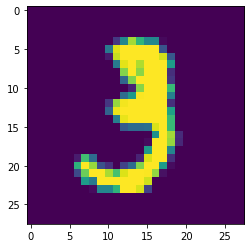

In [ ]:
plt.imshow(single_image)

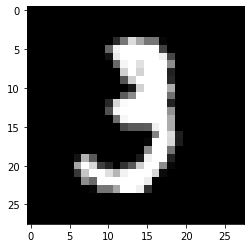

In [ ]:
plt.imshow(single_image,cmap='gray')

> ## 2] Preprocessing data

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
from keras.utils.np_utils import to_categorical

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_example = to_categorical(y_train)

In [ ]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
y_example.shape

(60000, 10)

In [ ]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
y_example[10]


array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
y_cp_test = to_categorical(y_test,10)

In [ ]:
y_cp_train = to_categorical(y_train,10)

> ## Processing X data

In [ ]:
single_image.max()

254

In [ ]:
single_image.min()

0

In [ ]:
#normalization
x_train = x_train/255
x_test = x_test/255

In [ ]:
scaled_single = x_train[0]

In [ ]:
scaled_single.max()

0.00392156862745098

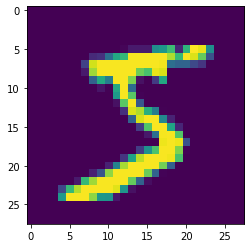

In [ ]:
plt.imshow(scaled_single)

>## 3] Reshaping the Data

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
x_test.shape

(10000, 28, 28, 1)

In [ ]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
x_test = x_test.reshape(10000, 28, 28, 1)

In [ ]:
x_test.shape

(10000, 28, 28, 1)

> ## 4] Training the Model

 Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

The sequential API allows you to create models layer-by-layer for most problems. It is limited in that it does not allow you to create models that share layers or have multiple inputs or outputs.

The functional API in Keras is an alternate way of creating models that offers a lot more flexibility, including creating more complex models.

he Sequential API is a framework for creating models based on instances of the sequential() class. The model has one input variable, a hidden layer with two neurons, and an output layer with one binary output. Additional layers can be created and added to the model.

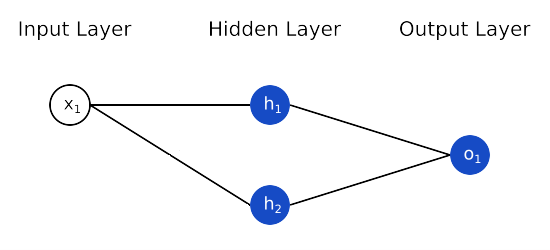

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_cp_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.7888 - accuracy: 0.7690
Epoch 2/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.3092 - accuracy: 0.9084
Epoch 3/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2370 - accuracy: 0.9293
Epoch 4/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.1883 - accuracy: 0.9446
Epoch 5/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1550 - accuracy: 0.9537
Epoch 6/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1322 - accuracy: 0.96070s - loss: 0.1322 - accuracy: 0.96
Epoch 7/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1161 - accuracy: 0.9661
Epoch 8/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1033 - accuracy: 0.9689
Epoch 9/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0939 - accuracy: 0.9722
Epoch 10/10
1875/1875 [=======

> ## 5] Evaluate the model

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
model.evaluate(x_test, y_cp_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0845 - accuracy: 0.9741


[0.08452604711055756, 0.9740999937057495]

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
predictions =  model.predict(x_test)

In [ ]:
import numpy as np

In [ ]:
y_pred = [np.argmax(i) for i in predictions]

In [ ]:
y_cp_test.shape

(10000, 10)

In [ ]:
y_cp_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
predictions[0]

array([1.0190518e-06, 2.1938220e-09, 1.4893000e-04, 2.6930089e-04,
       2.3531670e-11, 7.6450391e-08, 4.0633123e-14, 9.9957234e-01,
       3.0277763e-06, 5.3290514e-06], dtype=float32)

In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.98      0.99      1135
           2       0.95      0.98      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.97      0.97       892
           6       0.98      0.97      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.97      0.96      0.96       974
           9       0.96      0.97      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



### Conclusion- We have got accuracy of 97% using keras sequential model on mnist dataset.